## 차선인식 

### 이미지에 있는 오른쪽 차선과 왼쪽 차선을 찾아서 출력하는 코드 

#### * `opencv와 numpy 모듈을 통해 구현한 파이썬 코드이다.` 

In [3]:
!pip install opencv-python # opencv를 사용하기위해 설치해준다.

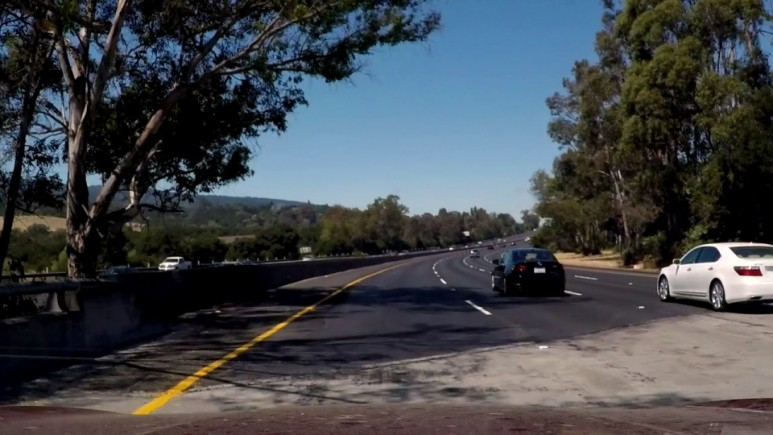

#### Import Module

In [4]:
import cv2  # opencv 사용
import numpy as np

#### Define Function 

1. 흑백이미지로 변환해주는 함수 : `cv2.cvtColor(image, cv2.color)` 사용<br>

  *cvtColor 는 기본 BGR의 컬러를 바꿀 수 있는 함수이다.* <br>
   대표적으로, <br>

    **GRAY**<br>
    COLOR_BGR2GRAY, COLOR_GRAY2BGR<br>
    COLOR_RGB2GRAY, COLOR_GRAY2RGB<br>

    **HSV**<br>
    COLOR_BGR2HSV, COLOR_HSV2BGR<br>
    COLOR_RGB2HSV, COLOR_HSV_RGB<br>

    **YCrCb**<br>
    COLOR_BGR2HSVYCrCb, COLOR_YCrCb2BGR<br>
    COLOR_RGB2HSVYCrCb, COLOR_YCrCb2RGB<br>

    **Luv**
    COLOR_BGR2Luv, COLOR_Luv2BGR<br>
    COLOR_RGB2Luv, COLOR_Luv2RGB<br>

  의 컬러를 사용해볼 수 있다. 여기에서는 COLOR_RGB2GRAY를 사용하여 흑백으로 바꾸어주는 함수를 구현하였다. 

In [5]:
def grayscale(img):  
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

2. Canny 알고리즘 사용 : `cv2.Canny(image, threshold1, threshold2, edges=None, apertureSize=None, L2gradient=None)`사용 <br>

  - image : 입력 이미지 <br>
  - threshold1, threshold2 : 최소, 최대 threshold 지정<br>
  - edges : edges 에 Canny 함수의 결과를 저장할 변수 (파이썬에서는 적을 필요 없다.- 함수로 리턴받을 수 있기 때문)<br>
  - apertureSize : 이미지 gradient를 구할떄 사용하는 소벨 커널 크기 (default = 3)<br>
  - L2gradient : gradient 계산 방법 <br>
  
  <span style="color:blue">[알고리즘 작동방식]</span><br>
  
  1단계 ) 가우시안 필터로 이미지의 잡음을 제거한다. <br>
  2단계 ) Sobel Filter를 사용하여 Gradient 크기를 구한다. <br>
  3단계 ) 경계선 검출기에서 거짓 반응을 제거해준다. <br>
  4단계 ) 경계선으로 가능한 픽셀을 골라내기 위해서 double threshold방식을 적용한다.<br> 
  5단계 ) double threshold 방식에서  maxVal 이상 = strong edge / minVal ~ maxVal = weak edge로  설정한 후 <br> strong edge 와 연결되어 있는 weak edge를 edge로 판단, 그렇지 않은 부분은 제거한다.
      
  

In [6]:
def canny(img, low_threshold, high_threshold):  # Canny 알고리즘
    return cv2.Canny(img, low_threshold, high_threshold)

3. 가우시안 블러링을 적용하는 함수 : `cv.GaussianBlur(image, (kernel_size,kernel_size),0)`사용<br>
  - 중심에 높은 가중치를 부여하고, 지정한 커널 크기에 맞추어 시그마를 계산하여 블러처리를 해준다.

In [7]:
def gaussian_blur(img, kernel_size):  # 가우시안 필터
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

4. ROI를 셋팅하는 함수 : <br> `cv2.fillPoly(img,pts,color[,lineType[,shift[,offset]]])` -> 채워진 다각형을 그리는 함수사용<br> 

  - image : 이미지<br>
  - pts : 좌표점들 (x,y)<br>
  - color : 색상 (0 ~ 255)<br>
  - lineType : 선의 종류 <br>
  - shift : fractional bit (default = 0)<br>
  - offset : 모든 contour 점들의 offset<br>
  
 `cv2.bitwise_and(src1, src2[,dst[, mask]])`사용 -> 비트연산으로 and연산 진행<br>

   - src1, src2 : 이미지 파일<br>
   - dst : 결과 파일<br>
   - mask : 적용 영역 지정<br>

In [8]:
def region_of_interest(img, vertices, color3=(255, 255, 255), color1=255):  # ROI 셋팅

    mask = np.zeros_like(img)  # mask = img와 같은 크기의 빈 이미지 생성

    if len(img.shape) > 2:  # Color 이미지(3채널)라면 :
        color = color3
    else:  # 흑백 이미지(1채널)라면 :
        color = color1

    # vertices에 정한 점들로 이뤄진 다각형부분(ROI 설정부분)을 color로 채움
    cv2.fillPoly(mask, vertices, color)

    # 이미지와 color로 채워진 ROI를 합침
    ROI_image = cv2.bitwise_and(img, mask)
    return ROI_image

5. 선을 그려주는 함수 : `cv2.line(image,pt1,pt2,color[, thickness[,lineType[, shift]]])` -> 두 좌표를 잇는 선을 긋는 함수사용<br>
  - pt1, pt2 : 시작 , 종료 좌표 <br>
  - thickneww : 선 두께 (default = 1)<br>

In [9]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=2):  
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

6. 대표선을 그려주는 함수 

In [12]:
def draw_fit_line(img, lines, color=[255, 0, 0], thickness=10):  # 대표선 그리기
    cv2.line(img, (lines[0], lines[1]), (lines[2], lines[3]), color, thickness)

In [13]:
def get_fitline(img, f_lines):  # 대표선 구하기
    lines = np.squeeze(f_lines)
    lines = lines.reshape(lines.shape[0] * 2, 2)
    rows, cols = img.shape[:2]
    output = cv2.fitLine(lines, cv2.DIST_L2, 0, 0.01, 0.01)
    vx, vy, x, y = output[0], output[1], output[2], output[3]
    x1, y1 = int(((img.shape[0] - 1) - y) / vy * vx + x), img.shape[0] - 1
    x2, y2 = int(((img.shape[0] / 2 + 100) - y) / vy * vx + x), int(img.shape[0] / 2 + 100)

    result = [x1, y1, x2, y2]
    return result

7. 허프 변환을 해주는 함수 : `cv2.HoughLinesP(image, rho, theta, threshold, minLineLength, maxLineGap)` -> 임의의 점을 이용해 직선을 찾는 함수사용<br>
(이미지에서 모양을 찾는 가장 유용한 방법)<br>

  - rho : r 값의 범위 (0~1 실수)<br>
  - theta : 세타값의 범위 (0 ~ 180 정수)<br>
  - threshold : 만나는 점의 기준 <br>
  - minLineLength : 선의 최소 길이<br>
  - maxLineGap : 선과 선 사이의 최대 허용간격<br>

In [14]:
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):  # 허프 변환
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len,
                            maxLineGap=max_line_gap)
    # line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    # draw_lines(line_img, lines)

    return lines

8. 두 이미지를 overlap 하는 함수 : `cv2.addWeighted(src1, alpha, src2, beta, gamma)` -> 두 개의 이미지에 각각 가중치를 조절하여 더하는 함수 사용<br>
  - src1, src2 : 이미지<br> 
  - alpha : 이미지1의 가중치<br>
  - beta : 이미지2의 가중치<br>
  - gamma : 각 덧셈에 추가하는 값 <br>

In [15]:
def weighted_img(img, initial_img, α=1, β=1., λ=0.):  # 두 이미지 operlap 하기
    return cv2.addWeighted(initial_img, α, img, β, λ)

##### Lane Recognition

*이미지에 앞서 정의한 함수들을 적용해준다.*

In [17]:
image = cv2.imread('slope_test.jpg')  # 이미지 읽기

height, width = image.shape[:2]  # 이미지 높이, 너비

gray_img = grayscale(image)  # 흑백이미지로 변환

blur_img = gaussian_blur(gray_img, 3)  # Blur 효과

canny_img = canny(blur_img, 70, 210)  # Canny edge 알고리즘

vertices = np.array(
    [[(50, height), (width / 2 - 45, height / 2 + 60), (width / 2 + 45, height / 2 + 60), (width - 50, height)]],
    dtype=np.int32) # color를 채울 좌표 설정

ROI_img = region_of_interest(canny_img, vertices)  # ROI 설정

line_arr = hough_lines(ROI_img, 1, 1 * np.pi / 180, 30, 10, 20)  # 허프 변환
line_arr = np.squeeze(line_arr)

 - `np.arctan2(array1,array2)` : 요소별 아크탄젠트를 구하는 삼각함수<br>
 - `cv2.waitkey()` : 키 입력 대기 시간이다. 입력이 없으면 종료, 0이면 무한대기 <br>

In [18]:
# 기울기 구하기
slope_degree = (np.arctan2(line_arr[:, 1] - line_arr[:, 3], line_arr[:, 0] - line_arr[:, 2]) * 180) / np.pi

# 수평 기울기 제한
line_arr = line_arr[np.abs(slope_degree) < 160]
slope_degree = slope_degree[np.abs(slope_degree) < 160]

# 수직 기울기 제한
line_arr = line_arr[np.abs(slope_degree) > 95]
slope_degree = slope_degree[np.abs(slope_degree) > 95]

# 필터링된 직선 버리기
L_lines, R_lines = line_arr[(slope_degree > 0), :], line_arr[(slope_degree < 0), :]
temp = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
L_lines, R_lines = L_lines[:, None], R_lines[:, None]

# 왼쪽, 오른쪽 각각 대표선 구하기
left_fit_line = get_fitline(image, L_lines)
right_fit_line = get_fitline(image, R_lines)

# 대표선 그리기
draw_fit_line(temp, left_fit_line)
draw_fit_line(temp, right_fit_line)

result = weighted_img(temp, image)  # 원본 이미지에 검출된 선 overlap
cv2.imshow('result', result)  # 결과 이미지 출력
cv2.waitKey(0)

-1

#### Result Image

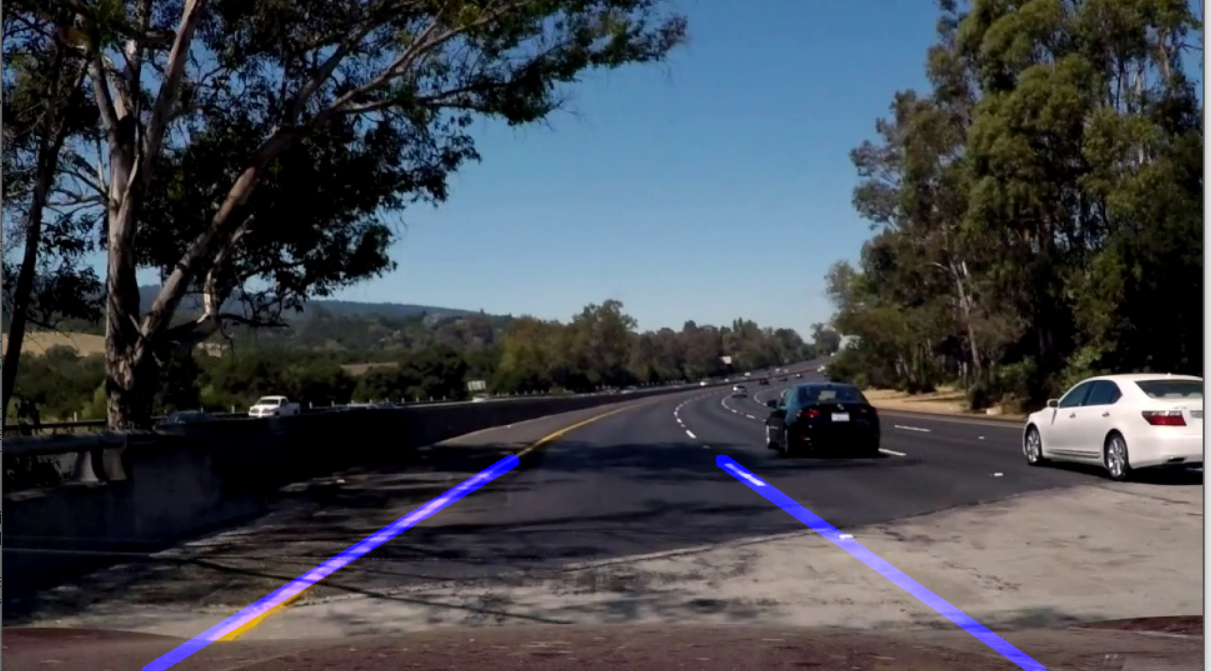

<span style="color:blue">[추가할 수 있는 방법들]</span>

1. 소실점(Vanishing Point) 의 사용 
   : 위에 출력된 두개의 파란 선을 기준으로 이 선을 무한 연장할 때 위쪽에서 
   교차점이 생기는 데, 그 점이 소실점이다. 이 소실점의 움직임을 Tracking 
   하면서 차량의 방향을 정할 수 있을 것이다. 
   
2. 칼만필터의 사용 
   : 칼만 필터는 측정된 데이터를 기반으로 통계적 예측을 하는 알고리즘으로
   이 필터를 사용하게 된다면 차선이 보이지 않는 경우에도 예측이 가능할 
   것이다. 
   
3. RANSAC(Random Sample Consensus) 알고리즘의 사용 
   : 차선외의 쓸모없는 직선들을 제외하기 위해 사용되는 알고리즘이다. 
   랜덤으로 점 2개를 뽑아서 직선을 만들어 얼마나 많은 점들이 그 직선에 
   포함되는지를 반복하여 최적의 직선을 찾는 방법이다. 

4. Bird's eye view 
   : 하늘에서 본 것과 같이 이미지를 재구성하여 차선을 인식하는 방법

<span style="color:blue">[곡선에 대한 고려의 필요성]</span>

현재 구현된 코드는 직선만을 고려한 코드이다. 하지만 차선의 인식에서 곡선을 인식하는 것은 중요한 문제일 것이다. 하지만 대부분의 오픈소스 코드들은 직선만을 구현한 경우가 많았는데, 곡선을 인식하는 코드를 구현하는 것이 쉽지 않기 때문이다. `Radius of Curvature`과 같은 공식을 이용해 구현하기도 한다.